# Creating combined AGAGE files

Before you run this tutorial, make sure you've run the setup script to create your config file.

In [6]:
from agage_archive.io import read_agage, read_ale_gage, output_dataset, combine_datasets

For this tutorial, we will use AGAGE testing files in this repo, combined with "real" ALE/GAGE files. If using with real AGAGE data, you can omit the testing_path keyword, or set to ```False```

In [7]:
testing_path = True

To read AGAGE netCDF files, use the read_agage function. E.g.:

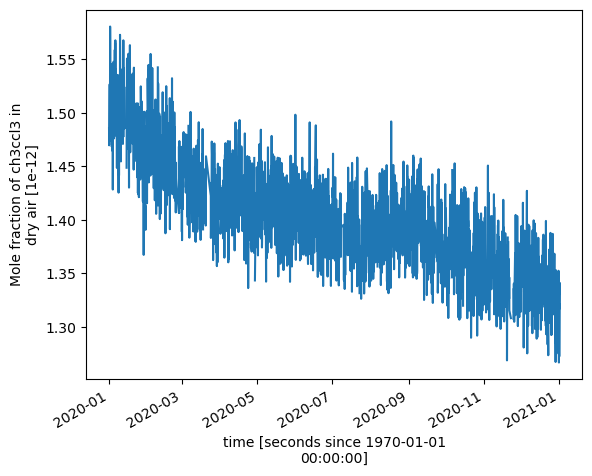

In [35]:
ds_agage = read_agage("CH3CCl3", "CGO", "GCMS-Medusa",
                      testing_path=testing_path)
ds_agage.mf.plot()

In [9]:
ds_agage

<xarray.Dataset>
Dimensions:           (time: 3446)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-01T10:11:00 ... 2021-01-0...
Data variables:
    mf                (time) float32 1.486 1.47 1.474 1.48 ... 1.332 1.331 1.34
    mf_repeatability  (time) float32 0.02557 0.02597 0.02469 ... 0.02935 0.02909
    inlet_height      (time) int16 75 75 75 75 75 75 75 ... 75 75 75 75 75 75 75
    sampling_period   (time) int16 1200 1200 1200 1200 ... 1200 1200 1200 1200
Attributes: (12/23)
    comment:                    NOTE, THIS FILE IS FOR TESTING ONLY. PLEASE R...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    ...                         ...
    instrument:                 agilent_5975
    instrument_date:            2012-08-01 00:00:00
    instrument_comment:         upgraded MSD detector with generally improved...
    instrument_1:               agilent_5973
    instrument_date_1:          2004-01-01 00:00:00
    instrument_comment_1:       original MSD detector

Similarly, ALE or GAGE data can be read using:

In [10]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE",
                        testing_path=testing_path)

In [11]:
ds_gage

<xarray.Dataset>
Dimensions:           (time: 50142)
Coordinates:
  * time              (time) datetime64[ns] 1981-11-30T13:01:00 ... 1994-12-2...
Data variables:
    mf                (time) float32 nan nan nan nan ... 101.3 101.2 101.7 100.7
    mf_repeatability  (time) float32 nan nan nan nan ... 2.026 2.024 2.034 2.014
    inlet_height      (time) int16 70 70 70 70 70 70 70 ... 70 70 70 70 70 70 70
    sampling_period   (time) int16 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30
Attributes: (12/20)
    comment:                    GAGE CH3CCl3 data from Kennaook/Cape Grim, Ta...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    ...                         ...
    site_code:                  CGO
    network:                    GAGE
    doi:                        
    instrument:                 GAGE_GCMD
    instrument_date:            1981-11-30
    instrument_comment:

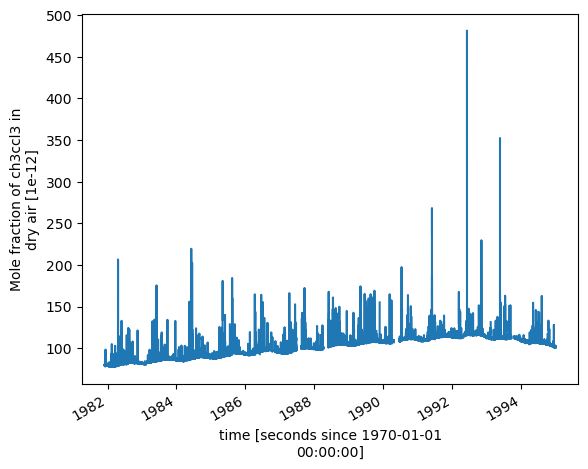

In [12]:
ds_gage.mf.plot()

The ```combine_datasets``` function calls these functions, based on the order in which they are specified in ```data/data_selector.json```.

Here, we will create a CH3CCl3 timeseries from CGO ALE, GAGE, GCMD and Medusa data:

In [26]:
ds = combine_datasets("CH3CCl3", "CGO", scale="SIO-05", testing_path=testing_path)

In [28]:
ds

<xarray.Dataset>
Dimensions:           (time: 73479)
Coordinates:
  * time              (time) datetime64[ns] 1978-07-08T05:08:00 ... 2021-01-0...
Data variables:
    mf                (time) float32 nan nan 60.44 60.44 ... 1.332 1.331 1.34
    mf_repeatability  (time) float32 nan nan 1.192 ... 0.02837 0.02935 0.02909
    inlet_height      (time) int16 70 70 70 70 70 70 70 ... 75 75 75 75 75 75 75
    sampling_period   (time) int16 30 30 30 30 30 ... 1200 1200 1200 1200 1200
    instrument_type   (time) int8 0 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4
Attributes: (12/32)
    comment:                    Combined AGAGE/GAGE/ALE dataset from the foll...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    ...                         ...
    instrument_3:               GAGE_GCMD
    instrument_date_3:          1981-11-30
    instrument_comment_3:       
    instrument_4:               ALE_GCMD
    instrument_date_4:          1978-07-08
    instrument_comment_4:

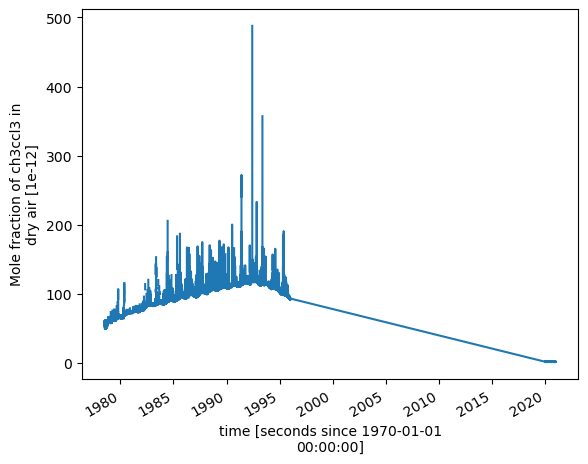

In [29]:
ds.mf.plot()

To output the file to the output directory, use the ```output_dataset``` function:

In [30]:
output_dataset(ds, network="AGAGE", instrument="combined",
               testing_path=testing_path)

Now try a species that's only measured on the Medusa:

In [31]:
ds = combine_datasets("NF3", "MHD", scale=None,
                    testing_path=testing_path)

In [33]:
ds

<xarray.Dataset>
Dimensions:           (time: 3254)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-01T00:41:00 ... 2020-12-2...
Data variables:
    mf                (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    mf_repeatability  (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    inlet_height      (time) int16 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
    sampling_period   (time) int16 1200 1200 1200 1200 ... 1200 1200 1200 1200
Attributes: (12/20)
    comment:                    NOTE, THIS FILE IS FOR TESTING ONLY. PLEASE R...
    github_url:                 https://github.com/mrghg/agage-archive
    data_owner_email:           s.odoherty@bristol.ac.uk
    data_owner:                 Simon O'Doherty
    station_long_name:          Mace Head, Ireland
    inlet_base_elevation_masl:  8.4
    ...                         ...
    site_code:                  MHD
    network:                    AGAGE
    doi:                        
    instrument:                 GCMS-Medusa
    instrument_date:            2020-01-01
    instrument_comment:

In [34]:
output_dataset(ds, network="AGAGE", instrument="GCMS-Medusa",
               testing_path=testing_path)